In [1]:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.collections import PatchCollection
import scipy.spatial, scipy.linalg
import scipy.sparse.linalg
from scipy.misc import logsumexp
from scipy.cluster.hierarchy import linkage, dendrogram
import itertools as it
from cvxopt.solvers import qp 
from cvxopt import matrix
import time
import sheet3 as imp3
import sheet4 as imp
import copy
%matplotlib inline

In [2]:
def zero_one_loss(y_true, y_pred):
    assert(len(y_true) == len(y_pred))
    pred = np.array(y_pred)
    true = np.array(y_true)
    true[np.where(true==-1)]=0
    b = np.mean(pred)
    pred[np.where(pred>=b)] = 1
    pred[np.where(pred<b)] = 0
    right = (true == pred).astype(np.int64).sum()
    loss = (len(true)-right)/len(true)
    return loss

## Assignment 4

Use your SVM SMO implementation to train classifiers on the easy_2d dataset from the ISIS site

In [9]:
data=np.load('easy_2d.npz')
Y_te= data['Y_te']
X_te= data['X_te']
X_tr= data['X_tr']
Y_tr= data['Y_tr']

(1) Find the optimal parameters C and σ for a Gaussian kernel and plot the results. Use your cross validation method. If you do not have a running cross validation method, contact us.

In [10]:
np.linspace(0.1,2.0,10)

array([ 0.1       ,  0.31111111,  0.52222222,  0.73333333,  0.94444444,
        1.15555556,  1.36666667,  1.57777778,  1.78888889,  2.        ])

In [11]:
para = { 'kernel': ['gaussian'], 'kernelparameter': np.logspace(-2,2,10), 'regularization': np.linspace(1.0,3.0,10)}

In [12]:
C=imp3.cv(X_tr.T,Y_tr,imp.svm_smo,para,loss_function=zero_one_loss)

Start iterarion:   1.9073486328125e-06


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


End  1 te iteration.  1 te fold.
Time:  88.97276520729065
Remain time:  4445.566093921661
End  1 te iteration.  2 te fold.
Time:  189.62835955619812
Remain time:  4529.447929859161
End  1 te iteration.  3 te fold.
Time:  280.6098167896271
Remain time:  3639.2644786834717
End  1 te iteration.  4 te fold.
Time:  367.7286515235901
Remain time:  3049.133414030075
End  1 te iteration.  5 te fold.
Time:  457.61345648765564
Remain time:  2696.521954536438
End  1 te iteration.  6 te fold.
Time:  548.2381625175476
Remain time:  2265.5996084213257
End  1 te iteration.  7 te fold.
Time:  637.3561646938324
Remain time:  1782.3462057113647
End  1 te iteration.  8 te fold.
Time:  725.7608704566956
Remain time:  1326.058759689331
End  1 te iteration.  9 te fold.
Time:  813.5026772022247
Remain time:  877.4106764793396
End  1 te iteration.  10 te fold.
Time:  898.4750921726227
Remain time:  424.8583698272705
End  2 te iteration.  1 te fold.
Time:  989.0424196720123
Remain time:  3622.654790878296
End 

In [25]:
print("Kernelparameter: ",C.kp)
print("C: ",C.c)
print("Number of Support Vector: ",len(C.SV))

Kernelparameter:  0.599484250319
C:  2.77777777778
Number of Support Vector:  39


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


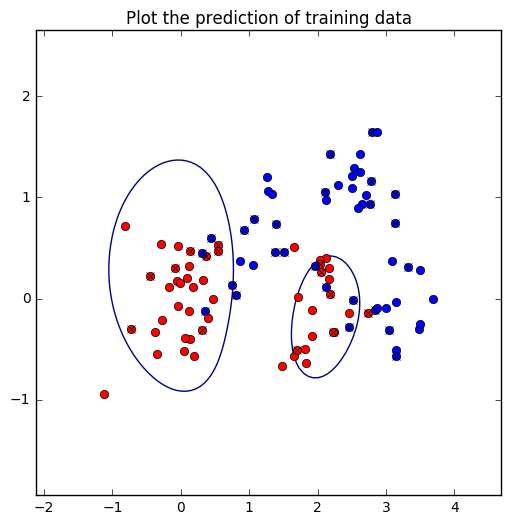

In [22]:
imp.plot_svm_2d(X_tr.T, Y_tr, C)
plt.title("Plot the prediction of training data")

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


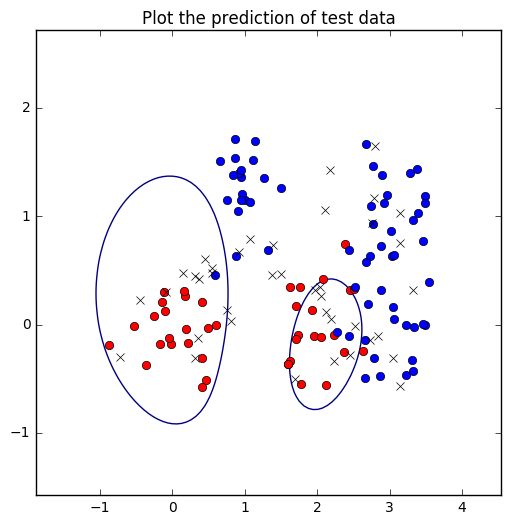

In [23]:
imp.plot_svm_2d(X_te.T, Y_te, C)
plt.title("Plot the prediction of test data")

In [15]:
np.logspace(-2,2,10)

array([  1.00000000e-02,   2.78255940e-02,   7.74263683e-02,
         2.15443469e-01,   5.99484250e-01,   1.66810054e+00,
         4.64158883e+00,   1.29154967e+01,   3.59381366e+01,
         1.00000000e+02])

(2). Train one model for a σ and C that obviously overfit and for a σ and C that obviously underfit the ddata. Plot the results.

In [71]:
Cu=imp.svm_smo('gaussian', 1.00000000e+02, 0.7)
Cu.fit(X_tr.T,Y_tr)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


In [72]:
print("Kernelparameter: ",Cu.kp)
print("C: ",Cu.c)
print("Number of Support Vector: ",len(Cu.SV))

Kernelparameter:  100.0
C:  0.7
Number of Support Vector:  88


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


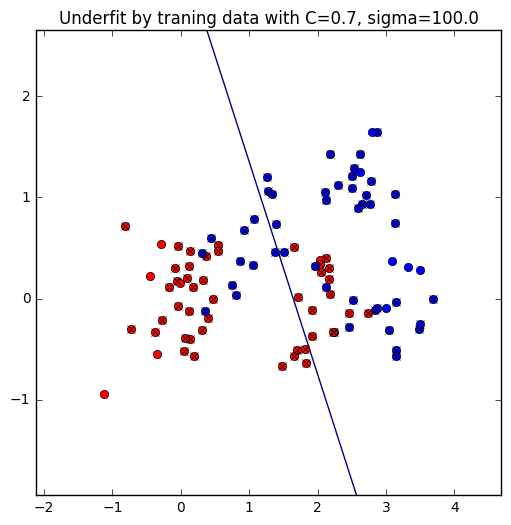

In [73]:
imp.plot_svm_2d(X_tr.T, Y_tr, Cu)
plt.title("Underfit by traning data with C=0.7, sigma=100.0")

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


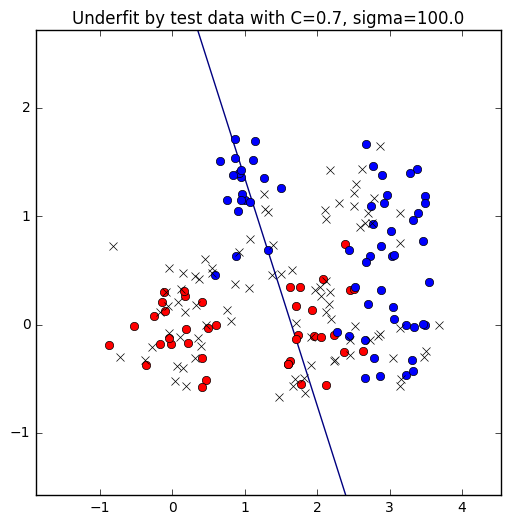

In [74]:
imp.plot_svm_2d(X_te.T, Y_te, Cu)
plt.title("Underfit by test data with C=0.7, sigma=100.0")

In [75]:
Co=imp.svm_smo('gaussian', 1.00000000e-01, 3.7)
Co.fit(X_tr.T,Y_tr)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


In [76]:
print("Kernelparameter: ",Co.kp)
print("C: ",Co.c)
print("Number of Support Vector: ",len(Co.SV))

Kernelparameter:  0.1
C:  3.7
Number of Support Vector:  67


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


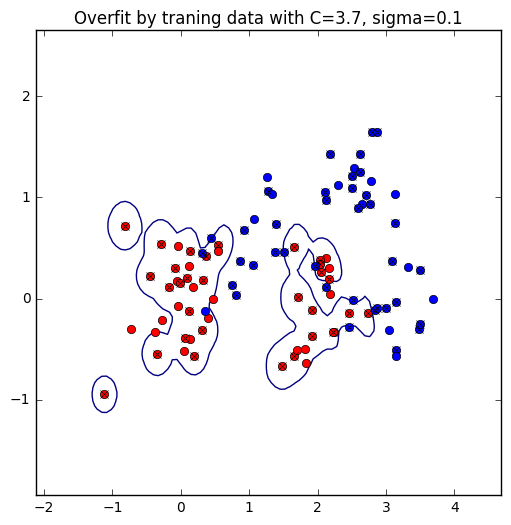

In [78]:
imp.plot_svm_2d(X_tr.T, Y_tr, Co)
plt.title("Overfit by traning data with C=3.7, sigma=0.1")

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


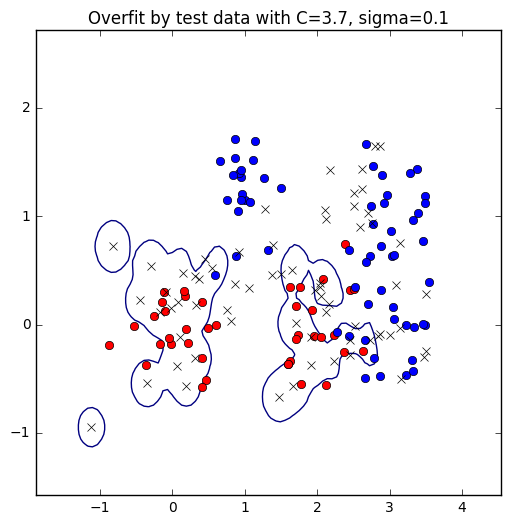

In [79]:
imp.plot_svm_2d(X_te.T, Y_te, Co)
plt.title("Overfit by test data with C=3.7, sigma=0.1")

(3). For optimal C and σ, plot a receiver operator characteristics (ROC) curve by varying the bias parameter b of your SVM model.

In [80]:
def bisachg(model,nb):
    new=copy.deepcopy(model)
    new.b = nb
    return new

def roc_fun(model,X, y_true):
    bins=100
    n=len(y_true)
    bias = np.linspace(-10,10,110)
    modset = [bisachg(model,b) for b in bias]
    pred_y = np.array([modset[i].predict(X) for i in range(len(modset))])
    npred_y = ((pred_y+1)/2)
    ny_true = ((y_true+1)/2).shape(1,len(y_true))
    tpr = (ny_true*npred_y).sum(1)/npred_y.sum()
    fpr = 
    
    fpr = .sum(1)/(n-true.sum())
    idx=np.argsort(fpr)
    roc = np.append(fpr.reshape(1,len(fpr)),tpr.reshape(1,len(tpr)),0)
    ROC = roc[:,idx]
    

    fpdif = ROC[0,1:]-ROC[0,:-1]
    lower = fpdif*ROC[1,:-1]
    upper = fpdif*ROC[1,1:]
    AUC = (lower.sum()+upper.sum())/2
    print("AUC = ",AUC)
    plt.plot(ROC[0],ROC[1])
    plt.title("ROC curve")
    plt.xlabel("FP")
    plt.ylabel("TP")




In [97]:
import copy
np.linspace(-10,10,100).shape

(100,)

In [109]:
def bisachg(model,nb):
    new=copy.deepcopy(model)
    new.b = nb
    return new


In [104]:
CC = copy.deepcopy(C)

In [118]:
X=X_te.T
model = CC
bias = np.linspace(-10,10,110)
modset = [bisachg(model,b) for b in bias]
pred_y = np.array([modset[i].predict(X) for i in range(len(modset))])

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


In [120]:
((pred_y+1)/2)[50]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


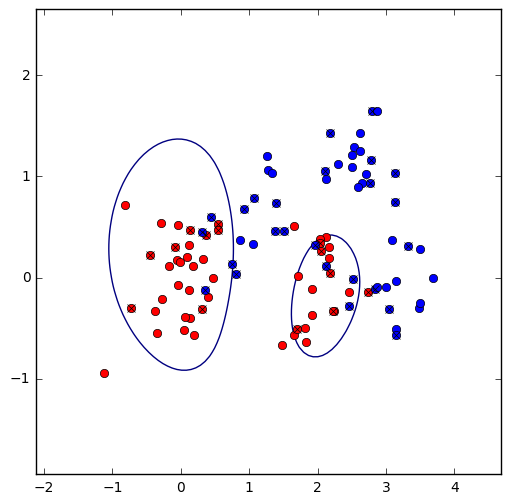

In [108]:
imp.plot_svm_2d(X_tr.T, Y_tr, CC)

## Assignment 6

In this assignment you will work on the UCI Iris dataset1. This is a 4-dimensional dataset with 150 instances in 3 classes. Use the .npy file from the ISIS site. Which classes are linearly separable from the two other classes and which classes are not? Are they separable with a non-linear classifier? Describe what you tested. Provide the found hyperparameters and classification accuracies.

In [5]:
class PCA():
    def __init__(self, X):
        # ...
        Xt = X.T
        C = np.cov(Xt)
        D, U = np.linalg.eigh(C)
        idx = np.argsort(-D)
        self.U = U.T[idx]
        self.D = D[idx]
        
    
    def project(self, X, m):
        # ...
        U = self.U.T
        M = U[:,:m] 
        Z = np.dot(M.T,X.T)
        Z = Z.T 
        return Z
    
    def denoise(self, X, m):
        Z = self.project(X,m)
        U = self.U.T
        Y = np.dot(U[:,:m],Z.T)
        Y = Y + np.mean(X,axis=1).reshape(len(Y),1)
        return Y.T

In [6]:
iris=np.load('iris.npz')
X = iris['X'].T
Y = iris['Y']

In [12]:
pca= PCA(X)
X_pro = pca.project(X,2)

In [22]:
Y1_23 = np.array(Y)
Y1_23[np.where(Y1_23==2)]=-1
Y1_23[np.where(Y1_23==3)]=-1
Y2_13 = np.array(Y)
Y2_13[np.where(Y2_13==1)]=-1
Y2_13[np.where(Y2_13==2)]=1
Y2_13[np.where(Y2_13==3)]=-1
Y3_13 = np.array(Y)
Y3_13[np.where(Y3_13==1)]=-1
Y3_13[np.where(Y3_13==2)]=-1
Y3_13[np.where(Y3_13==3)]=1

In [98]:
class cl():
    def __init__(self, a):
        self.b=a

In [99]:
cls = cl(1)

In [100]:
def bisachg(model,nb):
    new=copy.deepcopy(model)
    new.b = nb
    return new

In [101]:
clsset=[bisachg(cls,i) for i in range(10)]

In [102]:
for i in range(10):
    print(clsset[i].b)

0
1
2
3
4
5
6
7
8
9
